In [1]:
#importing needed libraries
import numpy as np #linear algebra
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
#inputing the data
df=pd.read_csv(r'diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
#exploratory data analysis

In [5]:
df.shape #displays shape (rows,columns)

(100000, 9)

In [6]:
#handle duplicates
duplicate_rows=df[df.duplicated()]
print("number of duplicate rows:",duplicate_rows.shape)

number of duplicate rows: (3854, 9)


In [7]:
df=df.drop_duplicates()

In [8]:
#missing values#check for null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [9]:
#uniqueness#count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [10]:
#describe the data
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


# Univariate Analysis

#### Bar plot for gender

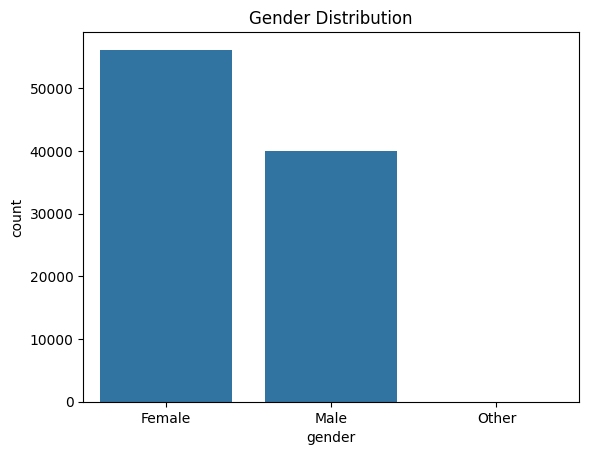

In [11]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

#### Histogram for age

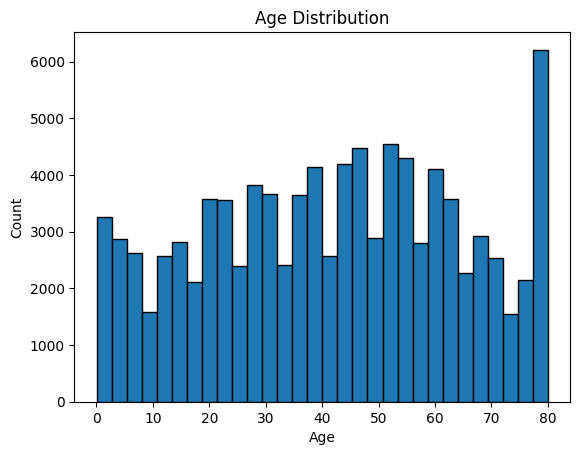

In [12]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Pie chart for smoking history distribution

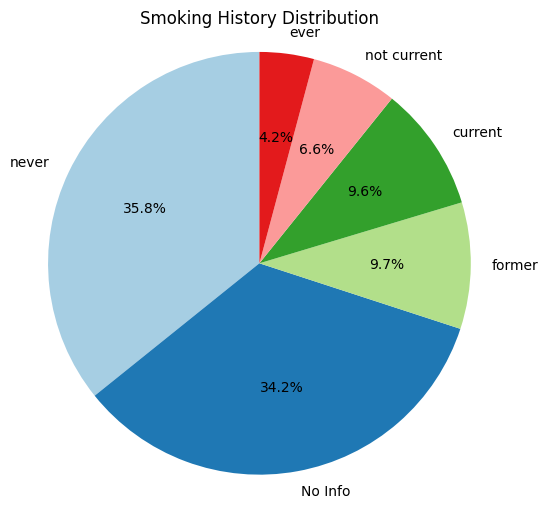

In [13]:
# Pie chart for smoking history distribution
smoking_counts = df['smoking_history'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Smoking History Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

#### Distribution plot for BMI

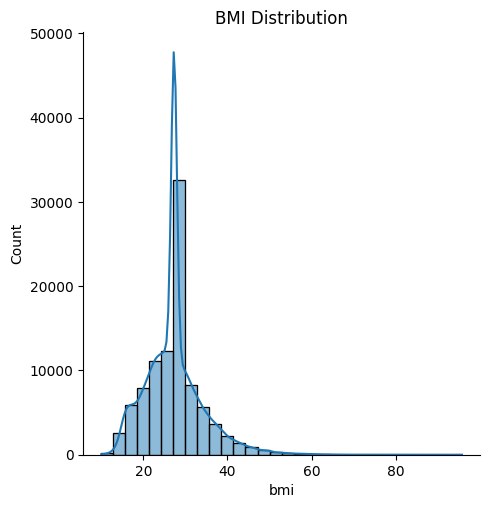

In [14]:
# Distribution plot for BMI
sns.displot(df['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.show()

#### Count plots for binary variables

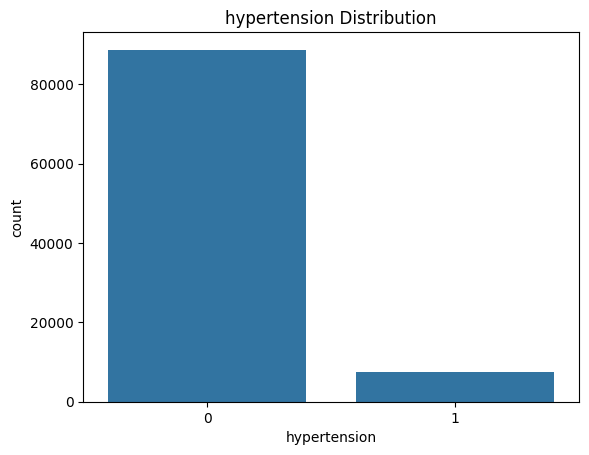

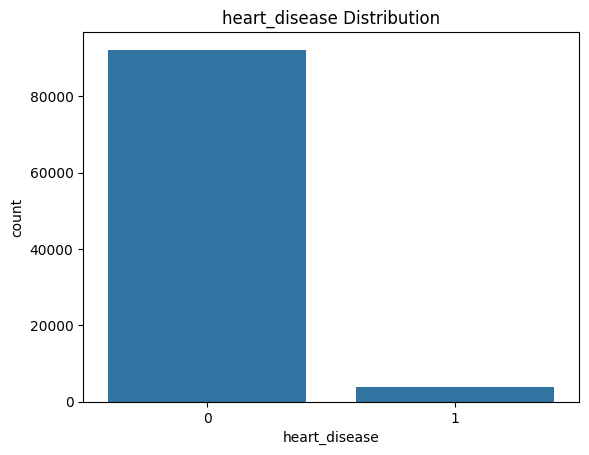

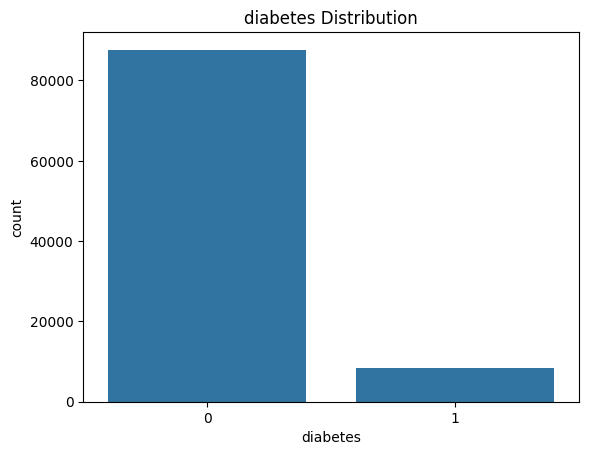

In [15]:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

# Bivariate Analysis

#### Boxplot for Diabetes VS Age

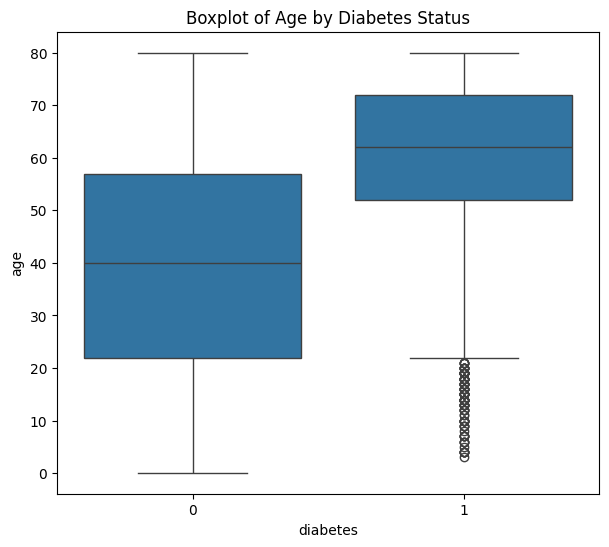

In [16]:
# Boxplot for Diabetes vs Age
plt.figure(figsize=(7, 6))
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Boxplot of Age by Diabetes Status')
plt.show()

#### Boxplot for BMI VS Diabetes classification

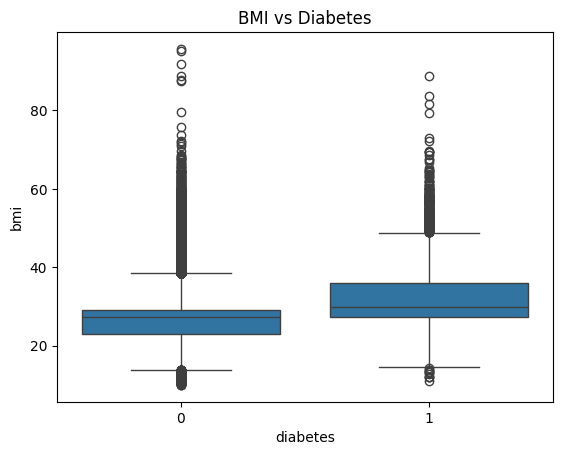

In [17]:
#Boxplot for BMI VS Diabetes Collection
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

#### Boxplot for Smoking History vs BMI

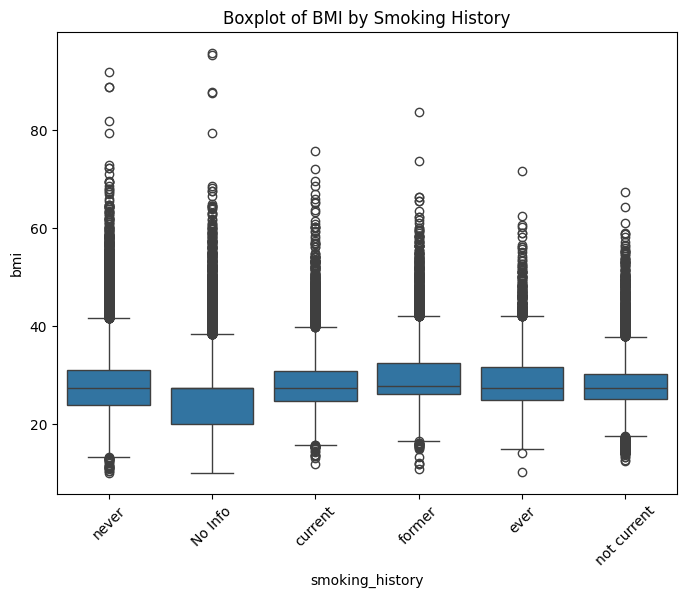

In [18]:
# Boxplot for Smoking History vs BMI
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoking_history', y='bmi', data=df)
plt.title('Boxplot of BMI by Smoking History')
plt.xticks(rotation=45)
plt.show()

#### Boxplot for Blood glucose level vs Diabetes classification

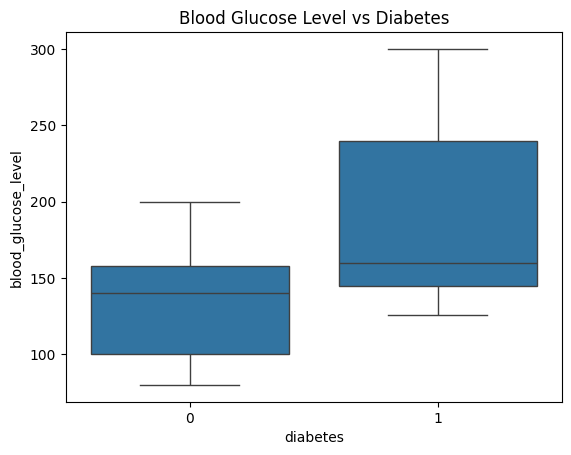

In [19]:
# Boxplot for blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

#### Stacked Column Chart for Gender VS Diabetes

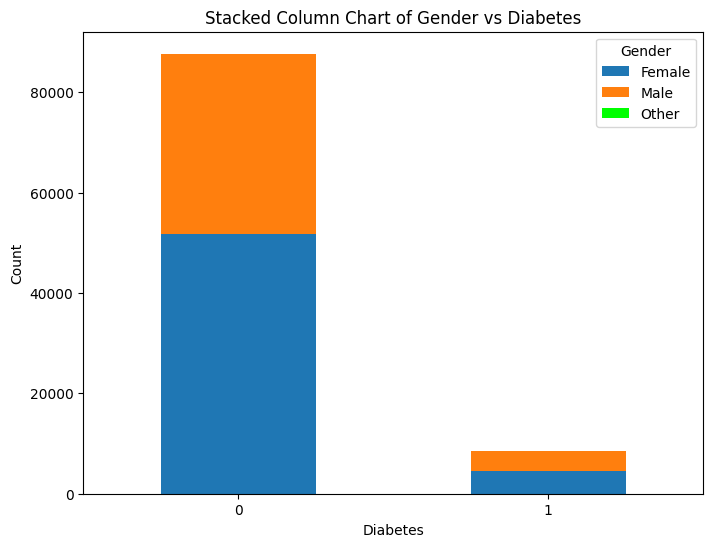

In [20]:
# Group by diabetes and gender to get counts for each combination
gender_diabetes = df.groupby(['diabetes', 'gender']).size().unstack()

# Plot the stacked column chart
gender_diabetes.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#1f77b4', '#ff7f0e', '#00FF00'])

# Adding labels and title
plt.title('Stacked Column Chart of Gender vs Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

# Multivariate Analysis

#### Scatter Plot for Age VS BMI colored by Diabetes Classification

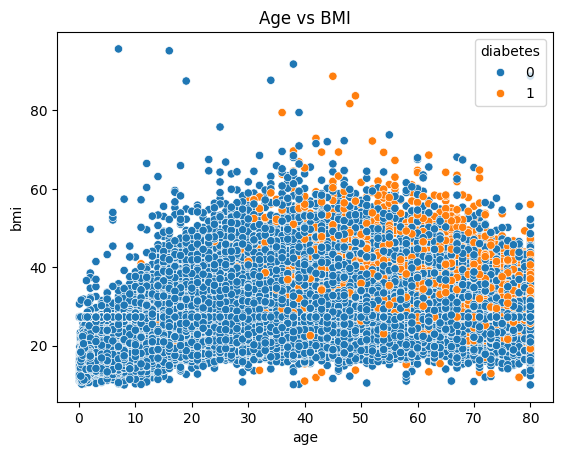

In [21]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

#### Interaction between Gender, Age and Diabetes

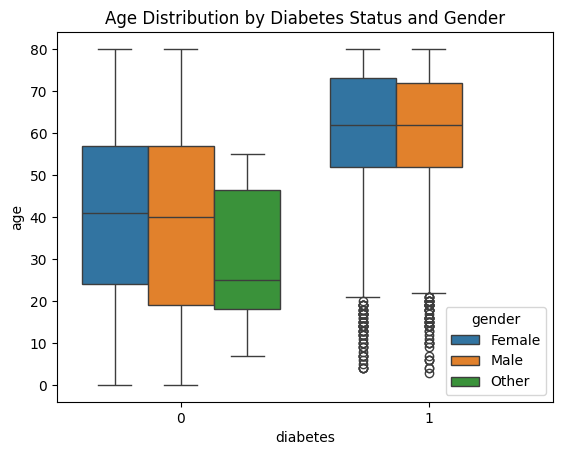

In [22]:
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

#### Interaction between Gender, BMI and Diabetes

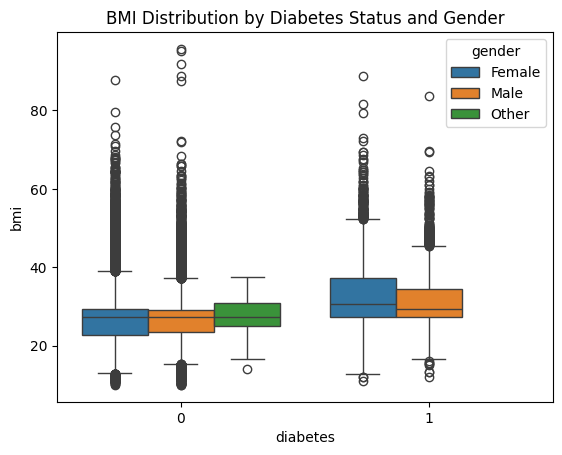

In [23]:
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

# Correlation 

#### Data Preparation

In [24]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67285
past_smoker    19664
current         9197
Name: count, dtype: int64


In [25]:
data = df.copy()

#### Correlation Matrix

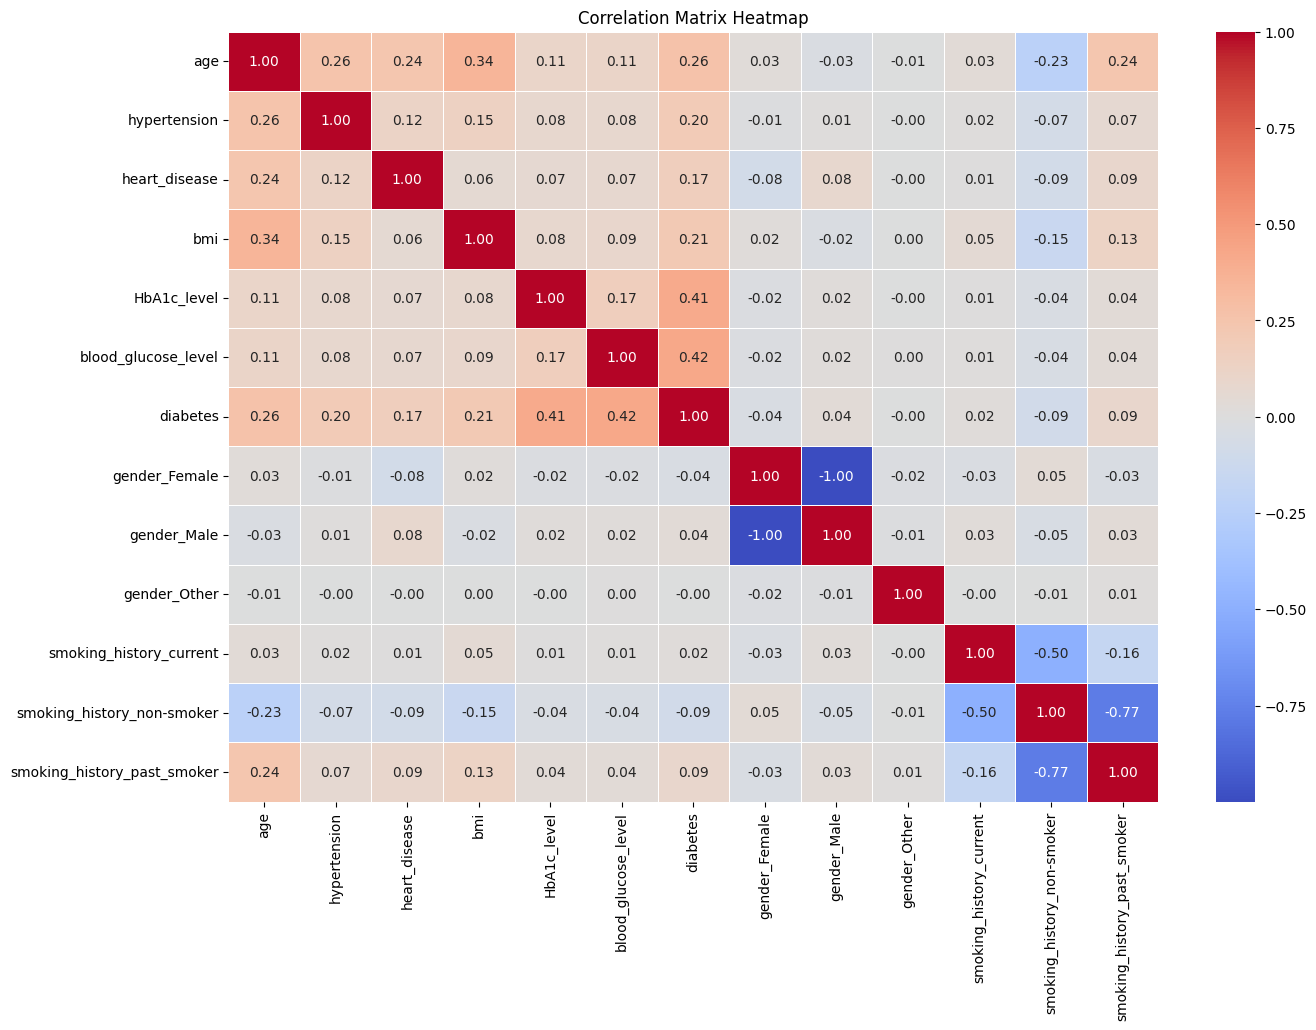

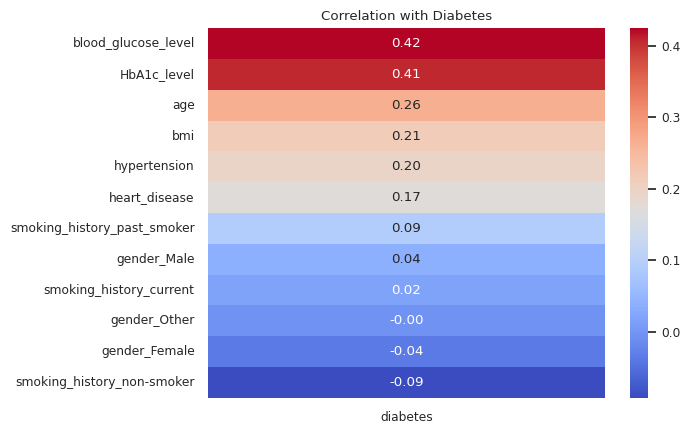

In [27]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()


#### Encoding

In [26]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

### LCA & PDA ANALYSIS

In [28]:
data['target'] = data['gender_Male']  # 1 for Male, 0 for Female

# Drop the original 'gender' columns after creating the target variable
data = data.drop(columns=['gender_Male', 'gender_Female'])

# Separate features and target
X = data.drop('target', axis=1)  # Features for PCA/LDA
y = data['target']  # Target for LDA

# Perform PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X)
print("PCA Result:")
print(X_pca)

# Create a DataFrame for PCA results (optional, for better visualization)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
print("\nPCA DataFrame:")
print(pca_df)

# Perform LDA
lda = LDA(n_components=1)  # LDA can have at most min(n_classes - 1, n_features) components
X_lda = lda.fit_transform(X, y)
print("\nLDA Result:")
print(X_lda)

# Create a DataFrame for LDA results (optional, for better visualization)
lda_df = pd.DataFrame(data=X_lda, columns=['LDA1'])
print("\nLDA DataFrame:")
print(lda_df)

PCA Result:
[[  5.16156504  37.42590911]
 [-56.87590083  17.38517636]
 [ 18.46320741 -15.45812749]
 ...
 [ 18.88978771  22.49314077]
 [-39.50952335 -13.2589649 ]
 [-46.73879237  18.91628376]]

PCA DataFrame:
             PC1        PC2
0       5.161565  37.425909
1     -56.875901  17.385176
2      18.463207 -15.458127
3      16.118412  -7.685414
4      19.640082  31.551379
...          ...        ...
96141   6.180084  -6.655227
96142 -41.801441 -36.991881
96143  18.889788  22.493141
96144 -39.509523 -13.258965
96145 -46.738792  18.916284

[96146 rows x 2 columns]

LDA Result:
[[ 2.21335555]
 [-0.88152957]
 [-0.21159974]
 ...
 [-0.20946088]
 [-0.46263331]
 [ 0.25722747]]

LDA DataFrame:
           LDA1
0      2.213356
1     -0.881530
2     -0.211600
3      0.729192
4      3.898641
...         ...
96141 -0.380933
96142  0.769637
96143 -0.209461
96144 -0.462633
96145  0.257227

[96146 rows x 1 columns]


### t-test , ChiSquare & ANOVA tests

In [32]:
from scipy import stats

numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Initialize a dictionary to store the results
t_test_results = {}

# Perform t-tests for each numerical column against diabetes
for col in numerical_cols:
    # Group data based on diabetes status (assuming 'diabetes' is a binary variable)
    group_0 = data[data['diabetes'] == 0][col]
    group_1 = data[data['diabetes'] == 1][col]
    
    # Perform the t-test
    t_stat, p_value = stats.ttest_ind(group_0, group_1, nan_policy='omit')
    
    # Store results
    t_test_results[col] = {'t_stat': t_stat, 'p_value': p_value}

# Display T-Test results
print("T-Test Results:")
for col, result in t_test_results.items():
    print(f"{col}: t_stat = {result['t_stat']:.2f}, p_value = {result['p_value']:.4f}")

T-Test Results:
age: t_stat = -85.19, p_value = 0.0000
bmi: t_stat = -68.24, p_value = 0.0000
HbA1c_level: t_stat = -137.92, p_value = 0.0000
blood_glucose_level: t_stat = -145.30, p_value = 0.0000


In [34]:
from scipy.stats import chi2_contingency

# Define the categorical variables to test
categorical_cols = ['hypertension', 'heart_disease']

# Initialize a dictionary to store the chi-square test results
chi_square_results = {}

# Perform Chi-Square tests for each categorical column against diabetes
for col in categorical_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(data[col], data['diabetes'])
    
    # Perform the chi-square test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Store results
    chi_square_results[col] = {'chi2_stat': chi2_stat, 'p_value': p_value}

# Display Chi-Square Test results
print("Chi-Square Test Results:")
for col, result in chi_square_results.items():
    print(f"{col}: chi2_stat = {result['chi2_stat']:.2f}, p_value = {result['p_value']:.4f}")


Chi-Square Test Results:
hypertension: chi2_stat = 3680.03, p_value = 0.0000
heart_disease: chi2_stat = 2798.87, p_value = 0.0000


In [36]:
from scipy.stats import f_oneway


numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Initialize a dictionary to store the ANOVA results
anova_results = {}

# Perform ANOVA for each numerical column against diabetes
for col in numerical_cols:
    # Group data based on diabetes status
    group_0 = data[data['diabetes'] == 0][col]
    group_1 = data[data['diabetes'] == 1][col]
    
    # Perform the ANOVA
    f_stat, p_value = f_oneway(group_0, group_1)
    
    # Store results
    anova_results[col] = {'f_stat': f_stat, 'p_value': p_value}

# Display ANOVA results
print("ANOVA Results:")
for col, result in anova_results.items():
    print(f"{col}: F-statistic = {result['f_stat']:.2f}, p-value = {result['p_value']:.4f}")

ANOVA Results:
age: F-statistic = 7257.36, p-value = 0.0000
bmi: F-statistic = 4656.55, p-value = 0.0000
HbA1c_level: F-statistic = 19021.65, p-value = 0.0000
blood_glucose_level: F-statistic = 21113.49, p-value = 0.0000
